In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # für Split Testdaten

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder # Encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler # für Skalierung numerischer Features

from sklearn.compose import make_column_selector # für Spalteneinteilung nominal, ordinal, numerisch

from sklearn.linear_model import LinearRegression # für lineare Regression
from sklearn.metrics import mean_squared_error, accuracy_score, balanced_accuracy_score, r2_score # Für Modelevaluation

from sklearn.linear_model import Ridge # Ridge Model
from sklearn.tree import DecisionTreeRegressor # DecisionTree
from sklearn.ensemble import RandomForestRegressor # Random Forest

from sklearn.impute import SimpleImputer # preprocessing pipeline
from sklearn.compose import ColumnTransformer # preprocessing pipeline
from sklearn.pipeline import make_pipeline # pipeline

from sklearn.ensemble import GradientBoostingRegressor # Gradient Booster
from sklearn.svm import SVC  # (S)upport (V)ector (C)lassifier

C:\Users\Mitja\anaconda3\lib\site-packages\numpy\core\getlimits.py:174: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(ld(-112)),
C:\Users\Mitja\anaconda3\lib\site-packages\numpy\core\getlimits.py:53: RuntimeWarning: divide by zero encountered in log10
  self.precision = int(-log10(self.eps))
C:\Users\Mitja\anaconda3\lib\site-packages\numpy\core\getlimits.py:54: RuntimeWarning: divide by zero encountered in power
  self.resolution = float_to_float(float_conv(10) ** (-self.precision))
C:\Users\Mitja\anaconda3\lib\site-packages\numpy\core\getlimits.py:186: RuntimeWarning: divide by zero encountered in exp2
  epsneg_f80 = exp2(ld(-64))
C:\Users\Mitja\anaconda3\lib\site-packages\numpy\core\getlimits.py:187: RuntimeWarning: divide by zero encountered in exp2
  tiny_f80 = exp2(ld(-16382))
C:\Users\Mitja\anaconda3\lib\site-packages\numpy\core\getlimits.py:201: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(ld(-63)),
C:\Users\Mitja\anaconda3\lib\site-packages\nump

C:\Users\Mitja\anaconda3\lib\site-packages\scipy\stats\_multivariate.py:29: RuntimeWarning: divide by zero encountered in log
  _LOG_2PI = np.log(2 * np.pi)
C:\Users\Mitja\anaconda3\lib\site-packages\scipy\stats\_multivariate.py:30: RuntimeWarning: divide by zero encountered in log
  _LOG_2 = np.log(2)
C:\Users\Mitja\anaconda3\lib\site-packages\scipy\stats\_multivariate.py:31: RuntimeWarning: divide by zero encountered in log
  _LOG_PI = np.log(np.pi)
C:\Users\Mitja\anaconda3\lib\site-packages\numpy\core\function_base.py:129: RuntimeWarning: divide by zero encountered in multiply
  start = asanyarray(start) * 1.0
C:\Users\Mitja\anaconda3\lib\site-packages\numpy\core\function_base.py:130: RuntimeWarning: divide by zero encountered in multiply
  stop  = asanyarray(stop)  * 1.0
C:\Users\Mitja\anaconda3\lib\site-packages\numpy\core\function_base.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  delta = stop - start
C:\Users\Mitja\anaconda3\lib\site-packages\numpy\core\

# Projektziel

Ziel dieses Projekts ist es, anhand von einer Reihe von Kenngrößen den Verkaufswert von Gebrauchtfahrzeugen in Großbritannien mit einem geeigneten Machine Learning Modell vorherzusagen. Grundlage für die Vorhersage ist der Datensatz 100000 UK Used Car Dataset, der unter Kaggle öﬀentlich verfügbar ist: 100000 UK Used Car Dataset.

__Der Datensatz__

Der Datensatz enthält 13 csv-Dateien: 
1. audi
2. bmw
3. ford
4. hyundi
5. merc
6. skoda
7. toyota
8. vauxhall
9. vw
10. cclass
11. focus
12. unclean cclass
13. unclean focus

Die ersten neun Datensätze ennthalten folgende Spalten Features: 
+ model (Automodel)
+ year (Registrierungsjahr)
+ price (Preis in englischen Pfund)
+ transmission (Art der Gangschaltung)
+ mileage (Kilometerstand)
+ fuelType(Treibstoff)
+ tax (Kfz-Steuer)
+ mpg (Miles per gallon - Verbrauch)
+ engineSize (Motorgröße in Litern)

Die Datensätze die letzen vier Datensätze enthalten dieselben Feature jedoch ohne tax und mpgSize. <br>
Die Datensätze "unclean cclass" und "unclean focus" enthalten zusätzlich die Features mileage2, fueltype2, enginesize2.

Die Datensätze "cclass" und "focus" werden im Weiteren nicht verwendet, da sie als einzelenes Model Teilmengen der Datensätze "merc" und "ford" darstellen.

Die Datensätze "unclean_cclass" und "unclean_focus" werden an ebensowenig betrachtet, da der Datenbereinigungsprozess in dem nötigen Umfang nicht Hauptfokus der Aufgabenstellun ist. 

# Daten kennen lernen am Beispiel des Audi Datensatzes

Mein erster Schritt ist, sich den Datensatz von Audi genauer anzuschauen und ein Baseline Model zu trainieren, um ein erstes Gefühl für die Daten zu erhalten. 

In [4]:
data_audi = pd.read_csv("audi.csv", sep=",")
data_audi.head(5)

C:\Users\Mitja\anaconda3\lib\site-packages\pandas\core\internals\managers.py:226: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\Mitja\anaconda3\lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\Mitja\anaconda3\lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\Mitja\anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:387: RuntimeWarning: divide by zero encountered in invert
  return ~res
C:\Users\Mitja\anaconda3\lib\site-packages\pandas\io\formats\format.py:1250: RuntimeWarning: divide by zero encountered in bitwise_and
  is_float_type = lib.map_infer(vals, is_float) & notna(vals)
C:\Users\Mitja\anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:262: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(v

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
# Datensatz aufteilen

df_train_audi, df_test_audi = train_test_split(data_audi, train_size=0.8)

In [4]:
df_train_audi.info()

# keine Null-Werte enthalten

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8534 entries, 7913 to 4721
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         8534 non-null   object 
 1   year          8534 non-null   int64  
 2   price         8534 non-null   int64  
 3   transmission  8534 non-null   object 
 4   mileage       8534 non-null   int64  
 5   fuelType      8534 non-null   object 
 6   tax           8534 non-null   int64  
 7   mpg           8534 non-null   float64
 8   engineSize    8534 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 666.7+ KB


In [5]:
# Ausprägungen Transmission

df_train_audi["transmission"].unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [6]:
# Ausprägung fueltype

df_train_audi["fuelType"].unique()

array(['Diesel', 'Petrol', 'Hybrid'], dtype=object)

In [7]:
# Zielvariable

df_train_audi["price"].describe()

count      8534.000000
mean      22792.781580
std       11492.521096
min        1699.000000
25%       15250.000000
50%       20000.000000
75%       27990.000000
max      145000.000000
Name: price, dtype: float64

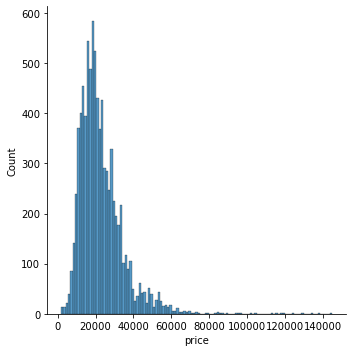

In [8]:
sns.displot(df_train_audi["price"])

## Korrelationen mit Zielvariable

In [9]:
df_train_audi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8534 entries, 7913 to 4721
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         8534 non-null   object 
 1   year          8534 non-null   int64  
 2   price         8534 non-null   int64  
 3   transmission  8534 non-null   object 
 4   mileage       8534 non-null   int64  
 5   fuelType      8534 non-null   object 
 6   tax           8534 non-null   int64  
 7   mpg           8534 non-null   float64
 8   engineSize    8534 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 666.7+ KB


### numerische Variablen

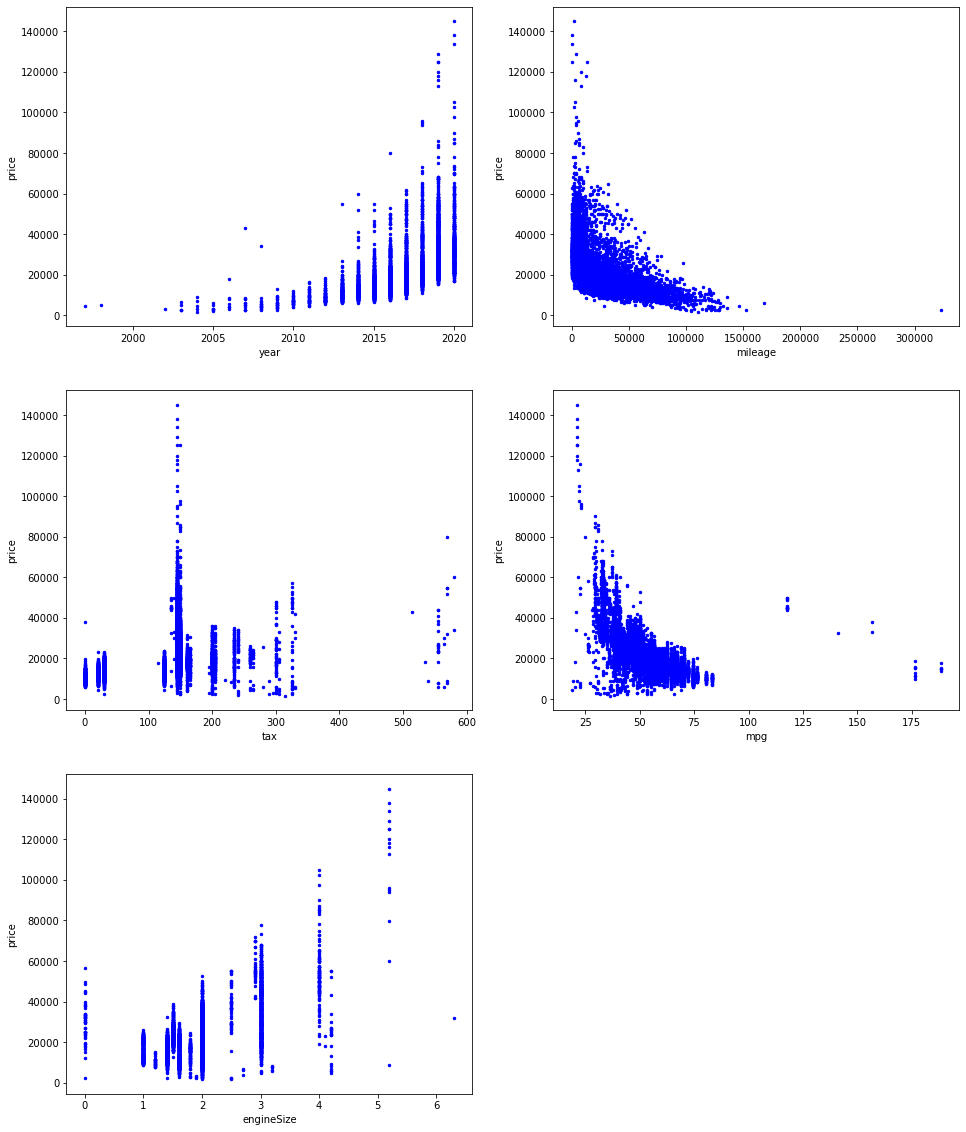

In [10]:
plt.figure(figsize=(16, 20))

# Der Befehl `plt.subplot` erlaubt mehrere Plots in einer Figure zu kombinieren.
# Dazu kann als Kurzschreibweise eine dreistellige Zahl als Argument übergeben werden.
# Diese müssen das Gitter der Subplots beschreiben und die Identifikationsnummer des aktuellen
# Plots beschreiben. Hier:

# 122 --> 1 Zeile, 2 Spalten, 2. Plot
plt.subplot(321)
plt.scatter(df_train_audi.iloc[:, 1], df_train_audi.iloc[:, 2], c="blue", s=6)
plt.xlabel("year")
plt.ylabel("price")

plt.subplot(322)
plt.scatter(df_train_audi.iloc[:, 4], df_train_audi.iloc[:, 2], c="blue", s=6)
plt.xlabel("mileage")
plt.ylabel("price")

plt.subplot(323)
plt.scatter(df_train_audi.iloc[:, 6], df_train_audi.iloc[:, 2], c="blue", s=6)
plt.xlabel("tax")
plt.ylabel("price")

plt.subplot(324)
plt.scatter(df_train_audi.iloc[:, 7], df_train_audi.iloc[:, 2], c="blue", s=6)
plt.xlabel("mpg")
plt.ylabel("price")

plt.subplot(325)
plt.scatter(df_train_audi.iloc[:, 8], df_train_audi.iloc[:, 2], c="blue", s=6)
plt.xlabel("engineSize")
plt.ylabel("price")

plt.show()

<AxesSubplot:>

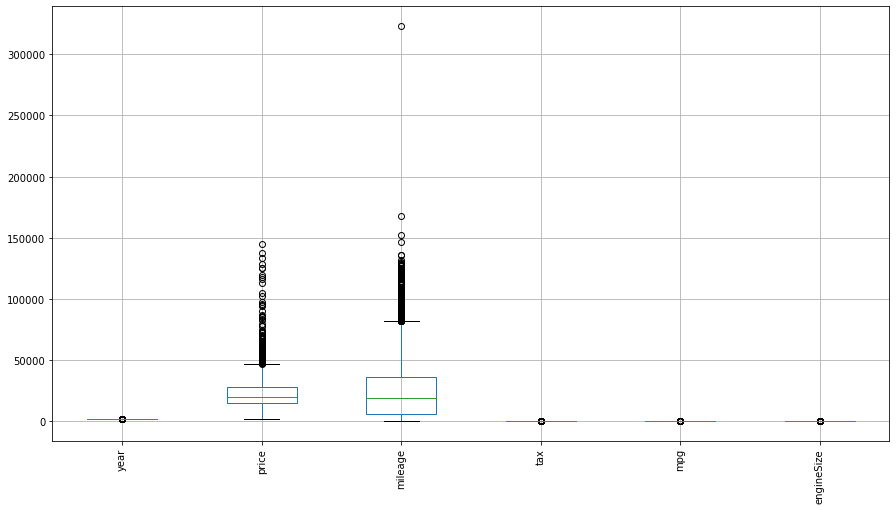

In [11]:
df_train_numeric = df_train_audi.drop(columns=["model", "transmission", "fuelType"]).select_dtypes(include="number")

plt.figure(figsize=(15, 8))
df_train_numeric.boxplot(rot=90)

### kategoriale Variablen

C:\Users\Alfa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transmission', ylabel='price'>

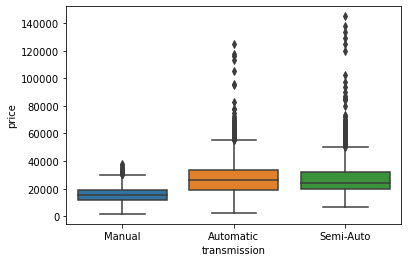

In [12]:
sns.boxplot(df_train_audi.iloc[:, 3], data_audi.iloc[:, 2])

C:\Users\Alfa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuelType', ylabel='price'>

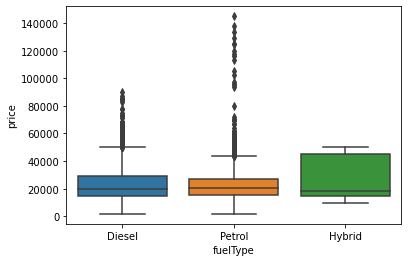

In [13]:
sns.boxplot(df_train_audi.iloc[:, 5], data_audi.iloc[:, 2])

C:\Users\Alfa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model', ylabel='price'>

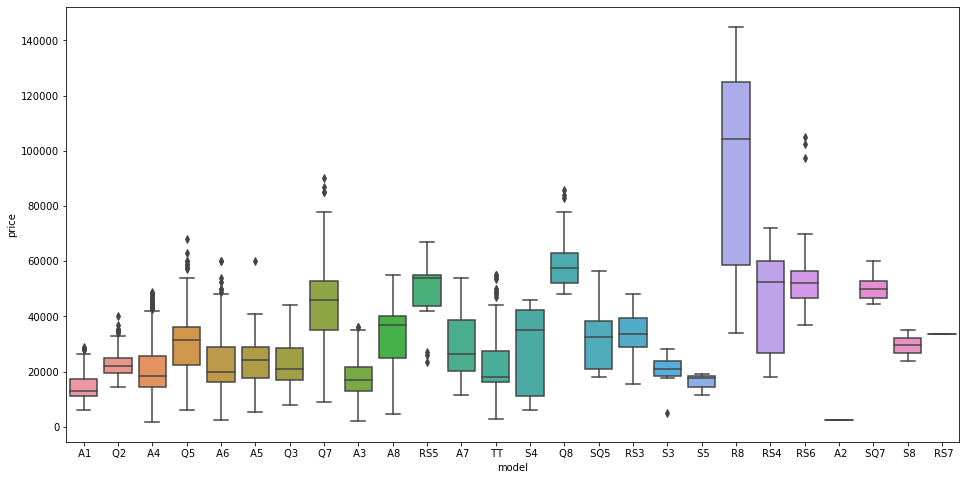

In [14]:
plt.figure(figsize=(16,8))
sns.boxplot(df_train_audi.iloc[:, 0], data_audi.iloc[:, 2])

### Korrelationsmatrix

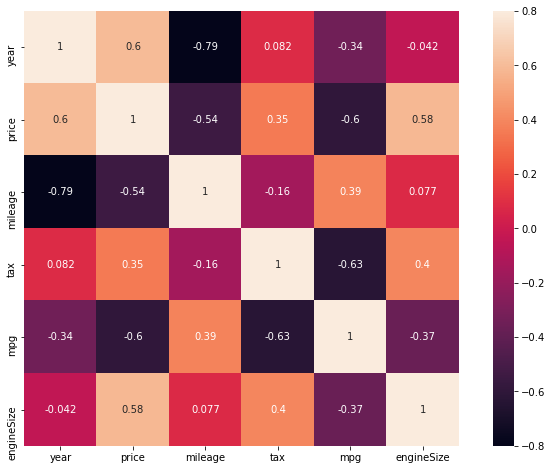

In [15]:
corrmat = df_train_audi.corr()

fig = plt.figure(figsize=(12, 8))
sns.heatmap(corrmat, vmax=0.8, vmin=-0.8, square=True, annot=True);

In [16]:
# Schnelle Auswahl der k Features mit der stärksten Korrelation
k = 10
k_best_features = corrmat["price"].abs().nlargest(k)
k_best_features

price         1.000000
mpg           0.596412
year          0.595853
engineSize    0.581494
mileage       0.538913
tax           0.350294
Name: price, dtype: float64

## Trainingsdaten vorbereiten

### Nominale Features encoden

In [17]:
nominal_columns = ["model", "transmission", "fuelType"]
# Nominale Kategorien können aus den Daten geschlossen werden
nominal_categories = [list(data_audi[column].unique()) for column in nominal_columns] 
nominal_categories

[[' A1',
  ' A6',
  ' A4',
  ' A3',
  ' Q3',
  ' Q5',
  ' A5',
  ' S4',
  ' Q2',
  ' A7',
  ' TT',
  ' Q7',
  ' RS6',
  ' RS3',
  ' A8',
  ' Q8',
  ' RS4',
  ' RS5',
  ' R8',
  ' SQ5',
  ' S8',
  ' SQ7',
  ' S3',
  ' S5',
  ' A2',
  ' RS7'],
 ['Manual', 'Automatic', 'Semi-Auto'],
 ['Petrol', 'Diesel', 'Hybrid']]

In [18]:
# ANMERKUNG: im ersten Versuch wurde nicht der drop Parameter beim OneHotEncoder verwendet, was zu unwahrscheinlichen 
# Werten bei Gewichten und Bias und entsprechend auch beim MSE/RMSE führten. Durch die Einführung des drop Parameters
# mit Wert = True konnte das Problem behoben werden
# (Reduntante "letzte" Spalte der jeweiligen nominalen Variablen wird entfernt)

# Encoding-Transformationen instanziieren und fitten
nominal_encoder = OneHotEncoder(categories=nominal_categories, sparse=False, drop="first")
nominal_encoder.fit(df_train_audi.loc[:, nominal_columns])

# Trainingsdaten transformieren
X_train_nominal = nominal_encoder.transform(df_train_audi.loc[:, nominal_columns])
X_train_nominal = pd.DataFrame(
    X_train_nominal,
    columns=nominal_encoder.get_feature_names(),
    index=df_train_audi.index
)

df_train_audi= pd.concat((
    X_train_nominal,
    df_train_audi.drop(columns=nominal_columns)
), axis=1)

df_train_audi.head(5)

,x0_ A6,x0_ A4,x0_ A3,x0_ Q3,x0_ Q5,x0_ A5,x0_ S4,x0_ Q2,x0_ A7,x0_ TT,...,x1_Automatic,x1_Semi-Auto,x2_Diesel,x2_Hybrid,year,price,mileage,tax,mpg,engineSize
7913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2014,6490,80000,20,68.9,2.0
3405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2013,7783,62331,125,52.3,1.4
7701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2019,22444,4000,145,47.9,1.6
1512,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2017,17444,12000,145,70.6,2.0
9530,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2019,38490,10200,145,38.2,2.0


### Numerische Features skalieren

In [19]:
df_train_numeric = df_train_audi.loc[:, ["year", "mileage", "tax", "mpg", "engineSize"]]
df_train_numeric

,year,mileage,tax,mpg,engineSize
7913,2014,80000,20,68.9,2.0
3405,2013,62331,125,52.3,1.4
7701,2019,4000,145,47.9,1.6
1512,2017,12000,145,70.6,2.0
9530,2019,10200,145,38.2,2.0
...,...,...,...,...,...
6272,2020,2888,150,39.2,1.5
529,2017,23655,30,55.4,1.4
4082,2015,22889,125,58.9,2.0
10093,2012,94366,30,64.2,2.0


In [20]:
numeric_selector = make_column_selector(dtype_include=np.number)
numeric_columns = numeric_selector(df_train_numeric)

In [21]:
scaler = MinMaxScaler()
scaler.fit(df_train_audi[numeric_columns])

df_train_audi.loc[:, numeric_columns] = scaler.transform(df_train_audi[numeric_columns])

<AxesSubplot:>

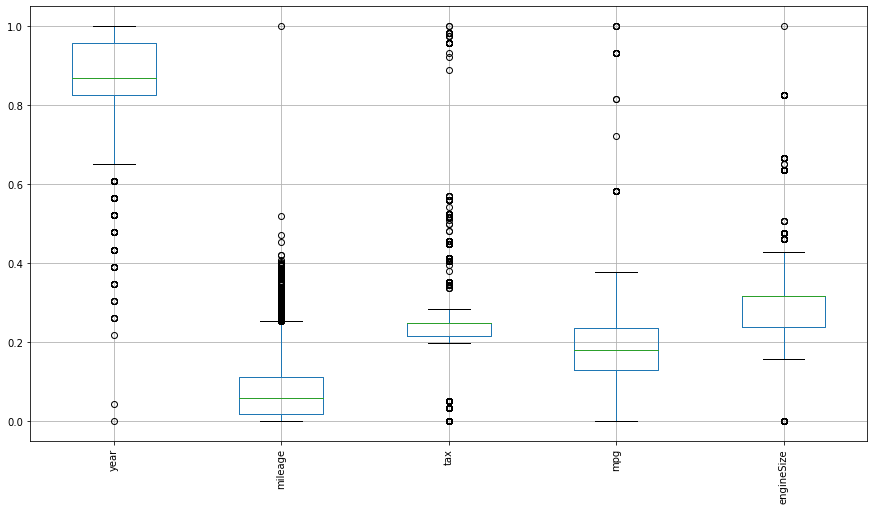

In [22]:
# Skalierung überprüfen

plt.figure(figsize=(15, 8))
df_train_audi[numeric_columns].boxplot(rot=90)

In [23]:
df_train_audi

,x0_ A6,x0_ A4,x0_ A3,x0_ Q3,x0_ Q5,x0_ A5,x0_ S4,x0_ Q2,x0_ A7,x0_ TT,...,x1_Automatic,x1_Semi-Auto,x2_Diesel,x2_Hybrid,year,price,mileage,tax,mpg,engineSize
7913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.739130,6490,0.247666,0.034483,0.295159,0.317460
3405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.695652,7783,0.192963,0.215517,0.197166,0.222222
7701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.956522,22444,0.012369,0.250000,0.171192,0.253968
1512,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.869565,17444,0.037137,0.250000,0.305195,0.317460
9530,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.956522,38490,0.031564,0.250000,0.113932,0.317460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6272,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.000000,36950,0.008926,0.258621,0.119835,0.238095
529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.869565,14495,0.073221,0.051724,0.215466,0.222222
4082,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.782609,16495,0.070849,0.215517,0.236128,0.317460
10093,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.652174,7500,0.292144,0.051724,0.267414,0.317460


## Baseline Modelle 

### Lineare Regression

#### Model trainieren

In [24]:
# Trainingsdaten aufteilen

X_train_1 = df_train_audi.iloc[:,0:-5]
X_train_2 = df_train_audi.iloc[:,-4:]
X_train_audi = pd.concat([X_train_1, X_train_2], axis=1)
y_train_audi = df_train_audi["price"]

X_train_audi

,x0_ A6,x0_ A4,x0_ A3,x0_ Q3,x0_ Q5,x0_ A5,x0_ S4,x0_ Q2,x0_ A7,x0_ TT,...,x0_ RS7,x1_Automatic,x1_Semi-Auto,x2_Diesel,x2_Hybrid,year,mileage,tax,mpg,engineSize
7913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.739130,0.247666,0.034483,0.295159,0.317460
3405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.695652,0.192963,0.215517,0.197166,0.222222
7701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.956522,0.012369,0.250000,0.171192,0.253968
1512,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.869565,0.037137,0.250000,0.305195,0.317460
9530,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.956522,0.031564,0.250000,0.113932,0.317460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6272,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.000000,0.008926,0.258621,0.119835,0.238095
529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.869565,0.073221,0.051724,0.215466,0.222222
4082,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.782609,0.070849,0.215517,0.236128,0.317460
10093,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.652174,0.292144,0.051724,0.267414,0.317460


In [25]:
LinReg_Model = LinearRegression()
LinReg_Model.fit(X_train_audi, y_train_audi)

LinearRegression()

In [26]:
# Koeffizienten untersuchen

# Gewichte = Koeffizienten = coef_
print(LinReg_Model.coef_)

# Bias = Intercept = intercept_
print(LinReg_Model.intercept_)

[  3702.82781077   1766.41852084   1307.63527331   2936.26505372
   6983.72805391   3196.08038699   8334.97175104   1382.04130431
   5071.47445628   3717.22172895  15148.36410364  27032.49593913
   9734.62831369   7858.73837461  24455.3693342   20989.77286008
  18956.2828819   59982.09957038  10378.88941374   1162.1760314
  20496.09020341   5295.36607821   2215.26866828  19068.25711494
  19190.0763782    1488.19797154   1642.96285485    873.68216814
  34304.05404872  41563.88065405 -25890.13863559 -16614.8576948
 -48534.7817231   27442.55071703]
-12109.735466169655


#### Testdaten aufbereiten

In [27]:
df_test_audi.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5245,Q5,2020,49990,Semi-Auto,5000,Diesel,145,34.5,3.0
6260,A4,2018,19750,Semi-Auto,18557,Petrol,145,50.4,1.4
3111,A1,2016,11602,Manual,24154,Petrol,30,57.6,1.4
2029,A5,2013,12640,Manual,46022,Diesel,30,60.1,2.0
8484,A6,2015,19780,Automatic,49373,Diesel,125,61.4,2.0


In [28]:
# Encoding-Transformationen instanziieren und fitten
# nominal_encoder = OneHotEncoder(categories=nominal_categories, sparse=False)
# nominal_encoder.fit(df_test_audi.loc[:, nominal_columns])

# Trainingsdaten transformieren
X_test_nominal = nominal_encoder.transform(df_test_audi.loc[:, nominal_columns])
X_test_nominal = pd.DataFrame(
    X_test_nominal,
    columns=nominal_encoder.get_feature_names(),
    index=df_test_audi.index
)

df_test_audi= pd.concat((
    X_test_nominal,
    df_test_audi.drop(columns=nominal_columns)
), axis=1)


df_test_audi.head(5)

,x0_ A6,x0_ A4,x0_ A3,x0_ Q3,x0_ Q5,x0_ A5,x0_ S4,x0_ Q2,x0_ A7,x0_ TT,...,x1_Automatic,x1_Semi-Auto,x2_Diesel,x2_Hybrid,year,price,mileage,tax,mpg,engineSize
5245,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,2020,49990,5000,145,34.5,3.0
6260,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2018,19750,18557,145,50.4,1.4
3111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2016,11602,24154,30,57.6,1.4
2029,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2013,12640,46022,30,60.1,2.0
8484,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2015,19780,49373,125,61.4,2.0


In [29]:
# Numerische Features skalieren

df_test_audi.loc[:, numeric_columns] = scaler.transform(df_test_audi[numeric_columns])

<AxesSubplot:>

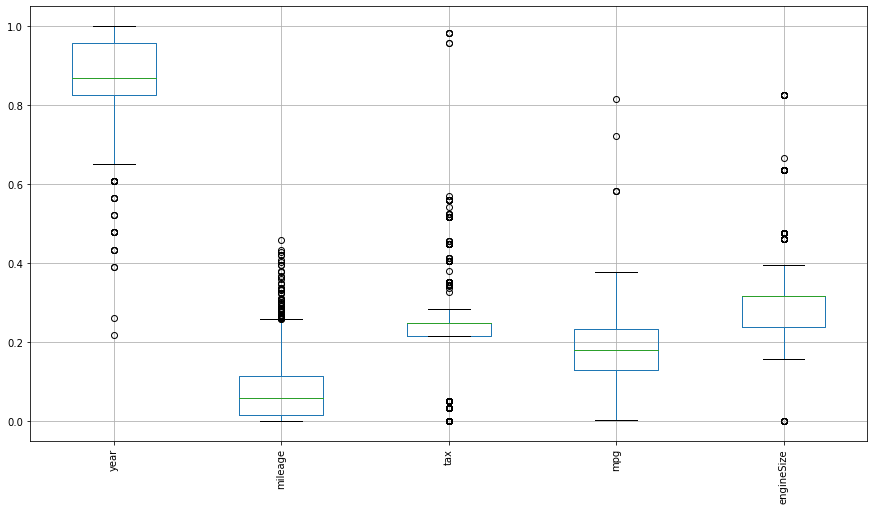

In [30]:
# Test durch Viszualisierung

plt.figure(figsize=(15, 8))
df_test_audi[numeric_columns].boxplot(rot=90)

In [31]:
# Daten aufbereiten

X_test_1 = df_test_audi.iloc[:,0:-5]
X_test_2 = df_test_audi.iloc[:,-4:]
X_test_audi = pd.concat([X_test_1, X_test_2], axis=1)
y_test_audi = df_test_audi["price"]

In [32]:
X_test_audi.shape

(2134, 34)

In [33]:
X_train_audi.shape

(8534, 34)

#### Model evaluieren

In [34]:
y_pred_audi_test = LinReg_Model.predict(X_test_audi)
y_pred_audi_train = LinReg_Model.predict(X_train_audi)

In [35]:
mse = mean_squared_error(y_train_audi, y_pred_audi_train)
print("MSE_train:", mse)
mse = mean_squared_error(y_test_audi, y_pred_audi_test)
print("MSE_test:", mse)

rmse = mean_squared_error(y_train_audi, y_pred_audi_train, squared=False) 
print("RMSE_train:", rmse, "UK Pfund")
rmse = mean_squared_error(y_test_audi, y_pred_audi_test, squared=False) 
print("RMSE_test:", rmse, "UK Pfund")

RegressionsKoeffizient = r2_score(y_train_audi, y_pred_audi_train) 
# Korrelation zwischen y_test und y_pred (Wert zwischen 0 und 1)
print("r2_score_train: ", RegressionsKoeffizient) # Erstrebenswert wäre hier 0.95
RegressionsKoeffizient = r2_score(y_test_audi, y_pred_audi_test) 
print("r2_score_test: ", RegressionsKoeffizient) 

MSE_train: 14337394.23849716
MSE_test: 17099840.42546585
RMSE_train: 3786.47517336337 UK Pfund
RMSE_test: 4135.195330992945 UK Pfund
r2_score_train:  0.891434833947402
r2_score_test:  0.8915345082939724


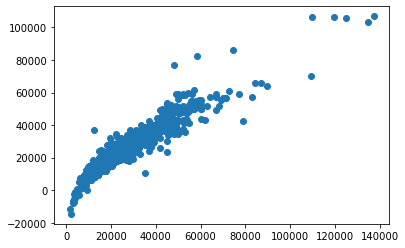

In [36]:
plt.scatter(y_test_audi, y_pred_audi_test) # stellt Zusammenhang zwischen y_test und y_pred da.

Die lineare Regression ist numerisch nicht sehr stabil, ebenso beim Encoding. Eine bessere Alternative ist das Ridge Model. DecisionTrees und Randomforests sind ebenso stabiler.

### Ridge Model

In [37]:
ridge_model = Ridge(alpha=0.001)
ridge_model.fit(X_train_audi, y_train_audi)

Ridge(alpha=0.001)

In [38]:
# TODO: Koeffizienten untersuchen

# Gewichte = Koeffizienten = coef_
print(ridge_model.coef_)

# Bias = Intercept = intercept_
print(ridge_model.intercept_)

[  3702.30020429   1765.93122821   1307.31125674   2935.99842104
   6983.36491431   3195.53537401   8333.39587317   1381.81504406
   5070.55172865   3716.76105512  15147.56236952  27029.98188286
   9733.56729548   7857.67822721  24454.46409624  20987.63335209
  18954.50793416  59977.15173757  10377.48818229   1160.06115394
  20491.33724574   5294.47920098   2213.29315862  19049.32722045
  19168.35143304   1488.38199294   1643.03434058    873.33638875
  34299.32900964  41564.02890108 -25890.47091671 -16612.85122789
 -48529.31349278  27445.95512329]
-12111.815943825848


In [39]:
# Vorhersage treffen
y_pred_audi_train = ridge_model.predict(X_train_audi)
y_pred_audi_test = ridge_model.predict(X_test_audi)

In [40]:
# Modell evaluieren

mse = mean_squared_error(y_train_audi, y_pred_audi_train)
print("MSE_train:", mse)
mse = mean_squared_error(y_test_audi, y_pred_audi_test)
print("MSE_test:", mse)

rmse = mean_squared_error(y_train_audi, y_pred_audi_train, squared=False) 
print("RMSE_train:", rmse, "UK Pfund")
rmse = mean_squared_error(y_test_audi, y_pred_audi_test, squared=False) 
print("RMSE_test:", rmse, "UK Pfund")

RegressionsKoeffizient = r2_score(y_train_audi, y_pred_audi_train) 
print("r2_score_train: ", RegressionsKoeffizient) 
RegressionsKoeffizient = r2_score(y_test_audi, y_pred_audi_test) 
print("r2_score_test: ", RegressionsKoeffizient) 

MSE_train: 14337394.446758075
MSE_test: 17099966.697731618
RMSE_train: 3786.4752008640007 UK Pfund
RMSE_test: 4135.210598957642 UK Pfund
r2_score_train:  0.8914348323704152
r2_score_test:  0.8915337073401006


### DecisionTree

In [41]:
# Model trainieren
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_audi, y_train_audi)

# Model evaluieren
y_pred_train = tree.predict(X_train_audi)
y_pred_test = tree.predict(X_test_audi)

mse_train = mean_squared_error(y_train_audi, y_pred_train)
print("Train_mse:", mse_train)
mse_test = mean_squared_error(y_test_audi, y_pred_test)
print("Test_mse:", mse_test)

rmse_train = mean_squared_error(y_train_audi, y_pred_train, squared=False) 
print("Train_rmse:", rmse_train)
rmse_test = mean_squared_error(y_test_audi, y_pred_test, squared=False) 
print("Test_rmse:", rmse_test)

RegressionsKoeffizient = r2_score(y_train_audi, y_pred_train) 
print("r2_score_train: ", RegressionsKoeffizient)
RegressionsKoeffizient = r2_score(y_test_audi, y_pred_test) 
print("r2_score_test: ", RegressionsKoeffizient) 

Train_mse: 5019558.156488779
Test_mse: 11967426.810285347
Train_rmse: 2240.4370458660023
Test_rmse: 3459.3968853378688
r2_score_train:  0.9619910594836932
r2_score_test:  0.9240897691945488


Bei DecisionTrees besteht jedoch die Gefahr des Overfittings. Daher wird auch noch ein Random Forest verwendet.

### Random Forest

In [42]:
# Modell trainieren
forest = RandomForestRegressor(
    n_estimators=100,  # Anzahl der Bäume. Sinnvolle sind 100, 200, 500, maximal 1000
    max_depth=10,  # Tiefe der Bäume
    n_jobs=-1,  # Anzahl der Prozessoren, -1 steht für alle vorhandenen
)

forest.fit(X_train_audi, y_train_audi)

# Modell evaluieren
y_pred_test = forest.predict(X_test_audi)
y_pred_train = forest.predict(X_train_audi)

mse_train = mean_squared_error(y_train_audi, y_pred_train)
print("Train_mse:", mse_train)
mse_test = mean_squared_error(y_test_audi, y_pred_test)
print("Test_mse:", mse_test)

rmse_train = mean_squared_error(y_train_audi, y_pred_train, squared=False) 
print("Train_rmse:", rmse_train)
rmse_test = mean_squared_error(y_test_audi, y_pred_test, squared=False) 
print("Test_rmse:", rmse_test)

RegressionsKoeffizient = r2_score(y_train_audi, y_pred_train) 
print("r2_score_train: ", RegressionsKoeffizient) 
RegressionsKoeffizient = r2_score(y_test_audi, y_pred_test) 
print("r2_score_test: ", RegressionsKoeffizient) 

Train_mse: 3914713.3437586543
Test_mse: 8048785.175675536
Train_rmse: 1978.5634545696669
Test_rmse: 2837.038099087768
r2_score_train:  0.970357130651237
r2_score_test:  0.9489459889686632


## Zwischenfazit Audi Datensatz

Die Größe des Einflusses auf den Preis je Variable ist wie folgt verteilt: 

+ price         1.000000
+ mpg           0.605814
+ engineSize    0.597907
+ year          0.589878
+ mileage       0.535722
+ tax           0.355191

Die Audi-Modelle weichen im Preis stark voneinander ab und sollten im Gesamtmodel berücksichtigt werden. 

Folgende Modelle wurden auf den Audi-Datensatz trainiert: Lineare Regression, Ridge Model, DecisionTree, Random Forest. 
Alle Modelle liefern einen r2_score und können als Baseline-Modelle verwendet werden. 

Die besten Ergebnisse liefern der DecisionTree und der Random Forest. Da beim DecisionTree die Gefahr des Overfitting besteht, kann der RandomForrest als bestes Model der verwendeten angesehen werden.

# Gesamtdatensatz erstellen

## Daten laden und vorbereiten

In [5]:
data_audi = pd.read_csv("audi.csv", sep=",", skipinitialspace=True)
data_bmw = pd.read_csv("bmw.csv", sep=",", skipinitialspace=True)
data_ford = pd.read_csv("ford.csv", sep=",", skipinitialspace=True)
data_hyundi = pd.read_csv("hyundi.csv", sep=",", skipinitialspace=True)
data_merc = pd.read_csv("merc.csv", sep=",", skipinitialspace=True)
data_skoda = pd.read_csv("skoda.csv", sep=",", skipinitialspace=True)
data_toyota = pd.read_csv("toyota.csv", sep=",", skipinitialspace=True)
data_vauxhall = pd.read_csv("vauxhall.csv", sep=",", skipinitialspace=True)
data_vw = pd.read_csv("vw.csv", sep=",", skipinitialspace=True)

C:\Users\Mitja\anaconda3\lib\site-packages\pandas\core\internals\managers.py:226: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():


In [6]:
data_audi["brand"] = "Audi"
data_bmw["brand"] = "BMW"
data_ford["brand"] = "Ford"
data_hyundi["brand"] = "Hyundi"
data_merc["brand"] = "Mercedes"
data_skoda["brand"] = "Skoda"
data_toyota["brand"] = "Toyota"
data_vauxhall["brand"] = "Vauxhall"
data_vw["brand"] = "VW"

In [7]:
data_hyundi.head(3)

C:\Users\Mitja\anaconda3\lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\Mitja\anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:387: RuntimeWarning: divide by zero encountered in invert
  return ~res
C:\Users\Mitja\anaconda3\lib\site-packages\pandas\io\formats\format.py:1250: RuntimeWarning: divide by zero encountered in bitwise_and
  is_float_type = lib.map_infer(vals, is_float) & notna(vals)
C:\Users\Mitja\anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:262: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\Mitja\anaconda3\lib\site-packages\pandas\io\formats\format.py:1373: RuntimeWarning: divide by zero encountered in invert
  imask = (~mask).ravel()
C:\Users\Mitja\anaconda3\lib\site-packages\pandas\io\formats\format.py:1416: RuntimeWarning: divide by zero encountered in absolute
  abs_vals = np.abs(self.values)
C:\Users

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize,brand
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2,Hyundi
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0,Hyundi
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7,Hyundi


In [46]:
# Spalte tax(£) umbennen
data_hyundi.rename(columns={"tax(£)":"tax"}, inplace=True)

In [47]:
# Datensätze zusammenführen
data = pd.concat([data_audi, data_bmw, data_ford, data_hyundi, data_merc, data_skoda, data_toyota, data_vauxhall, data_vw], axis=0)
data.shape

(99187, 10)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99187 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           99187 non-null  int64  
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   brand         99187 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.3+ MB


In [49]:
# Speicherplatz reduzieren

# String Variable in kategorische Variable umwandeln
data["model"] = data["model"].astype("category")
data["transmission"] = data["transmission"].astype("category")
data["fuelType"] = data["fuelType"].astype("category")
data["brand"] = data["brand"].astype("category")

# Downcasting
data[["year", "price", "mileage", "tax", "mpg"]] = data[["year", "price", "mileage", "tax", "mpg"]].apply(pd.to_numeric, downcast="unsigned")

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99187 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         99187 non-null  category
 1   year          99187 non-null  uint16  
 2   price         99187 non-null  uint32  
 3   transmission  99187 non-null  category
 4   mileage       99187 non-null  uint32  
 5   fuelType      99187 non-null  category
 6   tax           99187 non-null  uint16  
 7   mpg           99187 non-null  float64 
 8   engineSize    99187 non-null  float64 
 9   brand         99187 non-null  category
dtypes: category(4), float64(2), uint16(2), uint32(2)
memory usage: 3.9 MB


In [51]:
# Trainings und Testdaten erstellen

df_train, df_test = train_test_split(data, train_size=0.8)

## Daten untersuchen

In [52]:
# Ausprägungen Transmission

df_train["transmission"].unique()

['Semi-Auto', 'Manual', 'Automatic', 'Other']
Categories (4, object): ['Semi-Auto', 'Manual', 'Automatic', 'Other']

In [53]:
# Ausprägungen Transmission

df_train["model"].unique()

['Sharan', 'Touareg', 'Corsa', 'Octavia', 'Adam', ..., 'Caddy Maxi', 'Kadjar', 'R Class', 'Transit Tourneo', '220']
Length: 188
Categories (188, object): ['Sharan', 'Touareg', 'Corsa', 'Octavia', ..., 'Kadjar', 'R Class', 'Transit Tourneo', '220']

In [54]:
# Ausprägungen Transmission

df_train["brand"].unique()

['VW', 'Vauxhall', 'Skoda', 'Ford', 'Audi', 'Hyundi', 'BMW', 'Mercedes', 'Toyota']
Categories (9, object): ['VW', 'Vauxhall', 'Skoda', 'Ford', ..., 'Hyundi', 'BMW', 'Mercedes', 'Toyota']

In [55]:
# Ausprägungen Transmission

df_train["fuelType"].unique()

['Diesel', 'Petrol', 'Hybrid', 'Other', 'Electric']
Categories (5, object): ['Diesel', 'Petrol', 'Hybrid', 'Other', 'Electric']

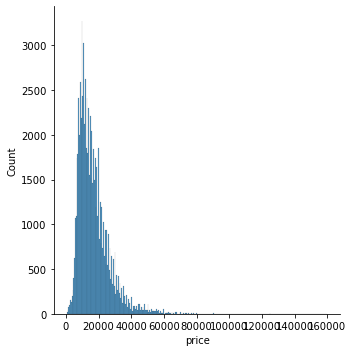

In [56]:
sns.displot(df_train["price"])

C:\Users\Alfa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='brand', ylabel='price'>

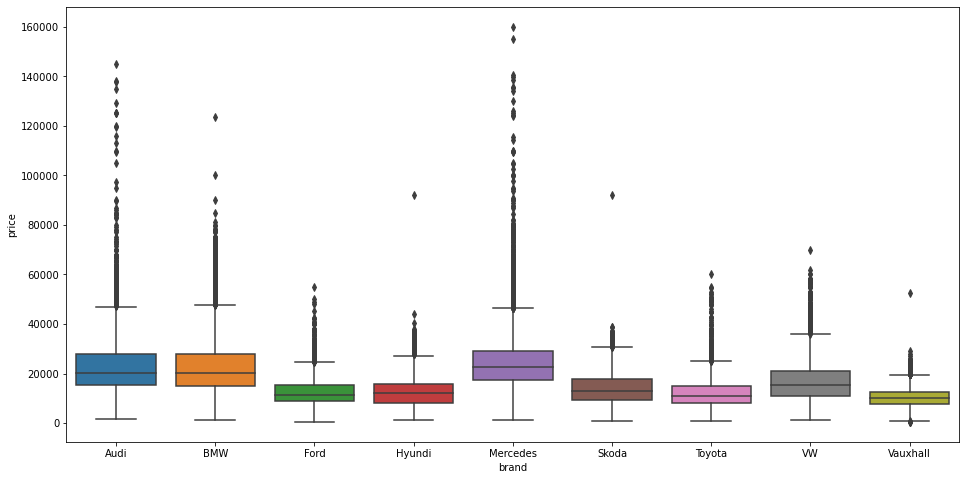

In [57]:
plt.figure(figsize=(16,8))
sns.boxplot(df_train.iloc[:, 9], df_train.iloc[:, 2])

In [58]:
df_train.shape

(79349, 10)

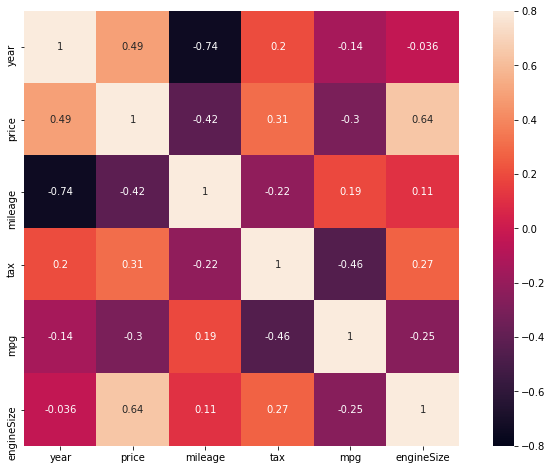

In [59]:
corrmat = df_train.corr()

fig = plt.figure(figsize=(12, 8))
sns.heatmap(corrmat, vmax=0.8, vmin=-0.8, square=True, annot=True);

In [60]:
# Schnelle Auswahl der k Features mit der stärksten Korrelation
k = 6
k_best_features = corrmat["price"].abs().nlargest(k)
k_best_features

price         1.000000
engineSize    0.638718
year          0.492981
mileage       0.418725
tax           0.307256
mpg           0.302859
Name: price, dtype: float64

## Trainingsdaten vorbereiten

### Nominale Features encoden

In [61]:
# Hier wird der gesamte Datensatz verwendet, um alle Kategorien zu haben

nominal_columns_data = ["model", "transmission", "fuelType", "brand"]
# Nominale Kategorien können aus den Daten geschlossen werden
nominal_categories_data = [list(data[column].unique()) for column in nominal_columns_data] 

In [62]:
# Encoding-Transformationen instanziieren und fitten
nominal_encoder = OneHotEncoder(categories=nominal_categories_data, sparse=False, drop="first")
nominal_encoder.fit(df_train.loc[:, nominal_columns_data])

# Trainingsdaten transformieren
X_train_nominal = nominal_encoder.transform(df_train.loc[:, nominal_columns_data])
X_train_nominal = pd.DataFrame(
    X_train_nominal,
    columns=nominal_encoder.get_feature_names(),
    index=df_train.index
)

df_train= pd.concat((
    X_train_nominal,
    df_train.drop(columns=nominal_columns_data)
), axis=1)

df_train.head(5)

,x0_A6,x0_A4,x0_A3,x0_Q3,x0_Q5,x0_A5,x0_S4,x0_Q2,x0_A7,x0_TT,...,x3_Skoda,x3_Toyota,x3_Vauxhall,x3_VW,year,price,mileage,tax,mpg,engineSize
12049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2017,19991,15352,150,54.3,2.0
13775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,2017,25999,30077,145,42.8,3.0
1033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2017,6990,24586,145,55.4,1.4
5963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2019,14640,14075,145,70.6,1.6
11294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,2017,7990,9654,125,53.3,1.2


### Numerische Features skalieren

In [63]:
# Vorauswahl für eine bessere Übersichtlichkeit in der Graphik
df_train_numeric = df_train_audi.loc[:, ["year", "mileage", "tax", "mpg", "engineSize"]]

numeric_selector = make_column_selector(dtype_include=np.number)
numeric_columns = numeric_selector(df_train_numeric)

In [64]:
scaler = MinMaxScaler()
scaler.fit(df_train[numeric_columns])

df_train.loc[:, numeric_columns] = scaler.transform(df_train[numeric_columns])

<AxesSubplot:>

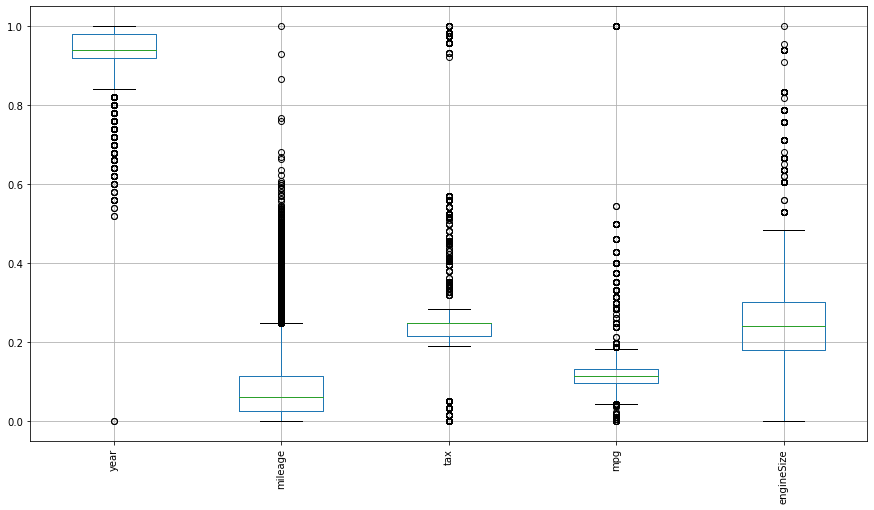

In [65]:
# Skalierung überprüfen

plt.figure(figsize=(15, 8))
df_train[numeric_columns].boxplot(rot=90)

In [66]:
# Trainingsdaten aufteilen

X_train = df_train.drop("price", axis=1)
y_train = df_train["price"]

## Testdaten vorbereiten

In [67]:
# Trainingsdaten transformieren
X_test_nominal = nominal_encoder.transform(df_test.loc[:, nominal_columns_data])
X_test_nominal = pd.DataFrame(
    X_test_nominal,
    columns=nominal_encoder.get_feature_names(),
    index=df_test.index
)

df_test= pd.concat((
    X_test_nominal,
    df_test.drop(columns=nominal_columns_data)
), axis=1)

In [68]:
# Numerische Features skalieren

df_test.loc[:, numeric_columns] = scaler.transform(df_test[numeric_columns])

<AxesSubplot:>

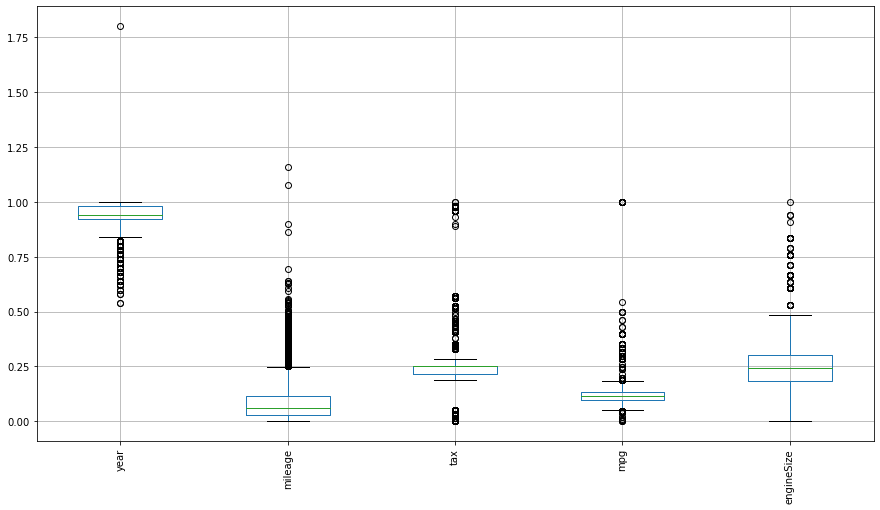

In [69]:
# Test durch Viszualisierung

plt.figure(figsize=(15, 8))
df_test[numeric_columns].boxplot(rot=90)

In [70]:
# Testdaten aufteilen

X_test = df_test.drop("price", axis=1)
y_test = df_test["price"]

# Baseline - Modelle auf Gesamtdatensatz trainieren

## Lineare Regression

In [71]:
# Model trainieren

data_LinReg = LinearRegression()
data_LinReg.fit(X_train, y_train)

LinearRegression()

In [72]:
# Koeffizienten untersuchen

# Gewichte = Koeffizienten = coef_
print(data_LinReg.coef_)

# Bias = Intercept = intercept_
print(data_LinReg.intercept_)

[ 4.47092096e+03  2.42564715e+03  1.94594829e+03  4.75279237e+03
  9.43696056e+03  3.99855680e+03  1.22318018e+04  3.34871914e+03
  5.17742915e+03  4.02417385e+03  1.73733906e+04  2.46829210e+04
  1.07544517e+04  8.77588024e+03  2.94314340e+04  2.26744423e+04
  2.15772106e+04  6.04534316e+04  1.20457748e+04  8.04088896e+02
  1.92656736e+04  4.98334299e+03 -5.89199516e+01  1.55341136e+04
  1.72678845e+14  3.01016289e+15  3.01016289e+15  3.01016289e+15
  3.01016289e+15  3.01016289e+15  3.01016289e+15  3.01016289e+15
  3.01016289e+15  3.01016289e+15  3.01016289e+15  3.01016289e+15
  3.01016289e+15  3.01016289e+15  3.01016289e+15  3.01016289e+15
  3.01016289e+15  3.01016289e+15  3.01016289e+15  3.01016289e+15
  3.01016289e+15  3.01016289e+15  3.01016289e+15  3.01016289e+15
  3.01016289e+15 -3.08347513e+15 -3.08347513e+15 -3.08347513e+15
 -3.08347513e+15 -3.08347513e+15 -3.08347513e+15 -3.08347513e+15
 -3.08347513e+15 -3.08347513e+15 -3.08347513e+15 -3.08347513e+15
 -3.08347513e+15 -3.08347

In [73]:
# Model evaluieren

y_pred_train = data_LinReg.predict(X_train)
y_pred_test = data_LinReg.predict(X_test)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE_train:", mse)
mse = mean_squared_error(y_test, y_pred_test)
print("MSE_test:", mse)

rmse = mean_squared_error(y_train, y_pred_train, squared=False) 
print("RMSE_train:", rmse, "UK Pfund")
rmse = mean_squared_error(y_test, y_pred_test, squared=False) 
print("RMSE_test:", rmse, "UK Pfund")

RegressionsKoeffizient = r2_score(y_train, y_pred_train) 
print("r2_score_train: ", RegressionsKoeffizient) 
RegressionsKoeffizient = r2_score(y_test, y_pred_test) 
print("r2_score_test: ", RegressionsKoeffizient) 

MSE_train: 13612705.904279305
MSE_test: 1.902131851081356e+27
RMSE_train: 3689.540066767036 UK Pfund
RMSE_test: 43613436588755.03 UK Pfund
r2_score_train:  0.8608763467836139
r2_score_test:  -1.99434221865705e+19


## Ridge Model

In [74]:
# Model instanziieren

data_ridge = Ridge(alpha=0.001)
data_ridge.fit(X_train, y_train)

Ridge(alpha=0.001)

In [75]:
# Koeffizienten untersuchen

# Gewichte = Koeffizienten = coef_
print(data_ridge.coef_)

# Bias = Intercept = intercept_
print(data_ridge.intercept_)

[ 4.47080057e+03  2.41813807e+03  1.95061845e+03  4.75460101e+03
  9.43022156e+03  3.99345557e+03  1.22864936e+04  3.34424670e+03
  5.19137065e+03  4.03525160e+03  1.73670497e+04  2.46915424e+04
  1.07345048e+04  8.79769036e+03  2.94475027e+04  2.26644785e+04
  2.15096594e+04  6.04502176e+04  1.20322955e+04  6.69206736e+02
  1.92905589e+04  4.99812017e+03  3.69191289e+01  1.54689059e+04
  0.00000000e+00 -8.70568917e+03 -1.02818544e+04 -1.30017625e+04
 -1.27550028e+03 -1.23847984e+04 -1.05483996e+04 -4.55470097e+03
 -1.06683691e+04  1.94296189e+03 -3.45848919e+03  2.97699050e+04
 -1.00686148e+04  1.55609953e+03 -7.81352821e+03  5.57207513e+03
  1.79450812e+04 -8.01006356e+03  2.67213224e+04  9.12280070e+03
  2.90437940e+04 -8.64507765e+02 -2.70077873e+03 -6.86090120e+03
  1.81973428e+03 -2.88451814e+03 -1.14042538e+03  3.99937615e+03
 -1.16033687e+03 -2.37479909e+03 -2.97675527e+03 -1.66875876e+03
 -7.49275614e+03  1.87359798e+03  1.39145672e+03 -4.33402187e+03
  3.62814350e+03 -5.02343

In [76]:
# Model evaluieren

y_pred_train = data_ridge.predict(X_train)
y_pred_test = data_ridge.predict(X_test)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE_train:", mse)
mse = mean_squared_error(y_test, y_pred_test)
print("MSE_test:", mse)

rmse = mean_squared_error(y_train, y_pred_train, squared=False) 
print("RMSE_train:", rmse, "UK Pfund")
rmse = mean_squared_error(y_test, y_pred_test, squared=False) 
print("RMSE_test:", rmse, "UK Pfund")

RegressionsKoeffizient = r2_score(y_train, y_pred_train) 
print("r2_score_train: ", RegressionsKoeffizient) 
RegressionsKoeffizient = r2_score(y_test, y_pred_test) 
print("r2_score_test: ", RegressionsKoeffizient)

MSE_train: 13612059.03124899
MSE_test: 13516903.21077947
RMSE_train: 3689.4524026268437 UK Pfund
RMSE_test: 3676.534130234543 UK Pfund
r2_score_train:  0.8608829579114659
r2_score_test:  0.858278327428073


## DecisionTree

In [77]:
# Model trainieren
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train, y_train)

# Model evaluieren
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
print("Train_mse:", mse_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Test_mse:", mse_test)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False) 
print("Train_rmse:", rmse_train)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False) 
print("Test_rmse:", rmse_test)

RegressionsKoeffizient = r2_score(y_train, y_pred_train) 
print("r2_score_train: ", RegressionsKoeffizient)
RegressionsKoeffizient = r2_score(y_test, y_pred_test) 
print("r2_score_test: ", RegressionsKoeffizient) 

Train_mse: 8397036.185246345
Test_mse: 9786134.696529267
Train_rmse: 2897.7639975067577
Test_rmse: 3128.2798302788174
r2_score_train:  0.9141811805458595
r2_score_test:  0.8973945913809412


## Random Forest

In [78]:
# Modell trainieren
forest = RandomForestRegressor(
    n_estimators=100,  # Anzahl der Bäume. Sinnvolle sind 100, 200, 500, maximal 1000
    max_depth=10,  # Tiefe der Bäume
    n_jobs=-1,  # Anzahl der Prozessoren, -1 steht für alle vorhandenen
)

forest.fit(X_train, y_train)

# Modell evaluieren
y_pred_test = forest.predict(X_test)
y_pred_train = forest.predict(X_train)

mse_train = mean_squared_error(y_train, y_pred_train)
print("Train_mse:", mse_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Test_mse:", mse_test)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False) 
print("Train_rmse:", rmse_train)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False) 
print("Test_rmse:", rmse_test)

RegressionsKoeffizient = r2_score(y_train, y_pred_train) 
print("r2_score_train: ", RegressionsKoeffizient) 
RegressionsKoeffizient = r2_score(y_test, y_pred_test) 
print("r2_score_test: ", RegressionsKoeffizient) 

Train_mse: 6866785.832107798
Test_mse: 7596804.722851436
Train_rmse: 2620.45527191513
Test_rmse: 2756.230165071748
r2_score_train:  0.9298205413725247
r2_score_test:  0.9203492209172419


## Zwischenfazit Baseline Modelle Gesamtdatensatz

Die Größe des Einflusses auf den Preis je Variable ist wie folgt verteilt: 

+ price         1.000000
+ engineSize    0.638394
+ year          0.486929
+ mileage       0.416372
+ tax           0.305890
+ mpg           0.300185
+ Name: price, dtype: float64

Die beim Audi Datensatz verwendeten Baseline Modelle lassen sich auch auf den Gesamtdatensatz anwenden, ausgenommen die Lineare Regression, die keine schlüssigen Ergebnisse liefert.

Die besten Ergebnisse liefert der Random Forest und wird somit als endgültiges Baseline Model verwendet

# DataPrep & Random Forest Scikit-Learn Pipeline

In [79]:
# Trainings und Testdaten neu erstellen

df_train, df_test = train_test_split(data, train_size=0.8)

In [80]:
# nominale und numerische Spalten vorbereiten

nominal_columns = ["model", "transmission", "fuelType", "brand"]
nominal_categories = [list(data[column].unique()) for column in nominal_columns]

numeric_columns = ["year", "price", "mileage", "tax", "mpg", "engineSize"]

numeric_selector = make_column_selector(dtype_include=np.number)
numeric_columns = numeric_selector(
    df_train.drop(columns=["price"])
    )

In [81]:
# X und y festlegen

X_train = df_train.loc[:, nominal_columns + numeric_columns]
y_train = df_train.loc[:, "price"]
X_test = df_test.loc[:, nominal_columns + numeric_columns]
y_test = df_test.loc[:, "price"]

In [82]:
# Encoder und Scaler instanzieren
# ANMERKUNG: Instanziieren reicht, da ColumnTransformer fit und transform von Encoder / Scaler ausführt.

# nominal_encoder instanziieren, fit & transform nicht 
nominal_encoder = OneHotEncoder(sparse=False, drop="first", categories=nominal_categories)

# numeric_scaler instanziieren
scaler = MinMaxScaler()

In [83]:
# Model trainieren

random_forest = RandomForestRegressor(
    n_estimators=100,  # Anzahl der Bäume. Sinnvolle sind 100, 200, 500, maximal 1000
    max_depth=10,  # Tiefe der Bäume
    n_jobs=-1,  # Anzahl der Prozessoren, -1 steht für alle vorhandenen
)

In [84]:
# Pipeline erstellen
# Im ColumnTransformer wird fit und transform durchgeführt. 
# Wenn nötig, hier eine Pipeline mit z.b. nominal_imputer + nominal_encoder vorschalten

preprocessor = ColumnTransformer(
    [
    ("nominal_preprocessing", nominal_encoder, nominal_columns), 
    ("numeric_preprocesor", scaler, numeric_columns)
    ],
    remainder="drop"# Zeilen, die unagetastet blieben / nicht in einer Pipline waren.
)

In [85]:
# Im letzten Schritt soll das Data Preprocessing mit dem Baseline Model in einer Pipeline verknüpft werden.
# In der Pipelin

# Pipeline instanziieren
random_forest_and_preprocessing = make_pipeline(
    preprocessor,
    random_forest
)

# Pipeline trainieren
random_forest_and_preprocessing.fit(
    X_train, 
    y_train
)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('nominal_preprocessing',
                                                  OneHotEncoder(categories=[['A1',
                                                                             'A6',
                                                                             'A4',
                                                                             'A3',
                                                                             'Q3',
                                                                             'Q5',
                                                                             'A5',
                                                                             'S4',
                                                                             'Q2',
                                                                             'A7',
                                                         

In [86]:
# r2_score ausgeben

print("r2_score_train: ", random_forest_and_preprocessing.score(X_train, y_train))
print("r2_score_test: ", random_forest_and_preprocessing.score(X_test, y_test))

r2_score_train:  0.9282080846986336
r2_score_test:  0.9214226850516374


In [87]:
# mse und rmse ausgeben

y_pred_train = random_forest_and_preprocessing.predict(X_train)
y_pred_test = random_forest_and_preprocessing.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Train_mse:", mse_train)
print("Test_mse:", mse_test)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False) 
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False) 
print("Train_rmse:", rmse_train)
print("Test_rmse:", rmse_test)

Train_mse: 7022285.316925826
Test_mse: 7504377.998457382
Train_rmse: 2649.9594934500083
Test_rmse: 2739.4119804179477


# Gradient Boosting

In [88]:
boosting = GradientBoostingRegressor(
n_estimators=100,
learning_rate=1
)

boosting_preprocessing = make_pipeline(
    preprocessor,
    boosting
    )

boosting_preprocessing.fit(X_train, y_train)

y_pred_train = boosting_preprocessing.predict(X_train)
y_pred_test = boosting_preprocessing.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("mse_train:", mse_train)
print("mse_test:", mse_test)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
print("rmse_train:", rmse_train)
print("rmse_test:", rmse_test)

RegressionsKoeffizient = r2_score(y_train, y_pred_train) 
print("r2_score_train: ", RegressionsKoeffizient) 
RegressionsKoeffizient = r2_score(y_test, y_pred_test) 
print("r2_score_test: ", RegressionsKoeffizient) 

mse_train: 5272664.008412334
mse_test: 5603139.41722359
rmse_train: 2296.2282134867028
rmse_test: 2367.0951432554607
r2_score_train:  0.9460952338418778
r2_score_test:  0.9413302940260647


# Zusammenfassung und Fazit

__Untersuchung Audi Datensatz__
+ Es wurde zunächst der Audi-Datensatz untersucht, um ein Gefühl für die Daten zu bekommen und erste Modelle zu prüfen.
+ Im Data Preprocessing wurde ein Encoding der nominalen Features, sowie eine Skalierung der numerischen Features vorgenommen.
+ Es wurden die Modelle Lineare Regression, Ridge, DecisionTree und Random Forest untersucht. 
+ Alle Modelle könnten als Baseline Model verwendet werden. Die besten Ergebnisse lieferte der Random Forest: <br><br>$TrainMse: 4189931.298830139, TestMse: 5915453.776949075, TrainRmse: 2046.9321676181992, TestRmse: 2432.1705896069616, r2ScoreTrain:  0.9698680857682106, r2ScoreTest:  0.954438078511791$.
+ Der r2 Score lag bei allen Modellen zischen 89 (Lineare Regression) und 96 (Random Forest), so dass hier augenscheinlich kein Over- oder Underfitting besteht.

__Untersuchung gesamter Datensatz__
+ Anschließend wurde der gesamte Datensatz betrachtet. Hierbei wurde die Marke als Feature hinzugenommen.
+ Die Audi-Modelle sind in Ihrer Preisspanne sehr unterschiedlich, daher wurden in den weiteren Betrachtungen auch die Modelle weiter berücksichtigt. Die Vielzahl der Modelle verursachten keine Herausforderungen im Data Preprocessing und der Modelerstellung und Evaluation.
+ Im Data Preprocessing wurde eine Reduzierung der Datensatzgröße, ein Encoding der nominalen Features, sowie eine Skalierung der numerischen Features vorgenommen.
<br>
+ Es wurden die selben Modelle wie im Audi Datensatz trainiert. Wieder lieferte der Random Forest die besten Ergebnisse mit <br><br> $TrainMmse: 6846499.532116714, TestMse: 8356073.613988444, TrainRmse: 2616.581650191087, TestRmse: 2890.6873947191943, r2ScoreTrain:  0.9290930015374518, r2ScoreTest:  0.9168834438840463$. 

+ Abschliessend wurde Gradient Boosting vorgenommen. Dieses lieferte auf den Gesamtdatensatz noch leicht verbesserte Werte: <br> <br> $mseTrain: 4705170.989512593, mseTest: 5883168.779431906, rmseTrain: 2169.140610820929, rmseTest: 2425.524433897112, r2ScoreTrain:  0.9521719833352353, r2ScoreTest:  0.9369097915440665$.

__Besonderheiten__:
+ Die Datensätze wurde jeweils zu Beginn nach Trainings- und Testdaten aufegeteilt, um ein möglichst realistisches Senario zu haben. <br> In den Testdaten kamen immer wieder Modelle (Features) vor, die in den Trainingsdaten nicht enthalten waren. Um dieser Herausforderung Herr zu werden, wurden für den OneHotEncoder die Kategorien (Modelle) des Gesamtdatensatzes verwendet, nicht die des Trainingsdatensatzes. Eine erste Internetrecherche zeigte, dass es für dieses Thema anscheinend bis noch keine endgültige Lösung gibt.
+ Für das DataPreprocessing wurde mit Hilfe des ColumnTransformers eine Pipeline erstellt und mit dem Random Forest als Baseline Model in eine gesamt Pipeline überführt (Data Preprocessing + Random Forest). 